# Cognifiz Restaurannt Data Analysis (Level-01)

* Task 01 (Top Cusines)
    * Determine the top three most common cuisines in the dataset.
    * Calculate the percentage of restaurants that serve each of the top cuisines.

* Task 02 (City Analysis)
    * Identify the city with the highest number of restaurants in the dataset.
    * Calculate the average rating for restaurants in each city.
    * Determine the city with the highest average rating.

* Task 03 (Price Range Distribution)
    * Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
    * Calculate the percentage of restaurants in each price range category.

* Task 04 (Online Delivery)
    * Determine the percentage of restaurants that offer online delivery.
    * Compare the average ratings of restaurants with and without online delivery.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print(os.getcwd())

C:\Users\Rohan\Documents\Projects\Cognifiz Restaurant Data Analysis\Cognifiz-Restaurant-Data-Analysis


In [3]:
df = pd.read_csv('Dataset .csv')

In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df_original = df.copy()

In [9]:
# Splitting Cuisines into a list and then exploding it such that only one cuisines is present in each row
df['Cuisines'] = df['Cuisines'].str.split(', ')
df = df.explode('Cuisines').reset_index(drop = True)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
2,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,Desserts,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
3,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
4,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Seafood,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [10]:
df['Cuisines'].value_counts().head(3)

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64

In [11]:
df['Cuisines'].describe()

count            19710
unique             145
top       North Indian
freq              3960
Name: Cuisines, dtype: object

In [12]:
df['Cuisines'].value_counts('North Indian').head(3)*100

Cuisines
North Indian    20.091324
Chinese         13.876205
Fast Food       10.076104
Name: proportion, dtype: float64

In [14]:
df = df_original.copy()
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [18]:
df['City'].value_counts().head(1)

City
New Delhi    5473
Name: count, dtype: int64

In [19]:
average_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()

In [47]:
for index, row in average_ratings.iterrows():
    print(f"{row['City']}: {row['Aggregate rating']:.2f}")

Abu Dhabi: 4.30
Agra: 3.96
Ahmedabad: 4.16
Albany: 3.55
Allahabad: 3.40
Amritsar: 3.69
Ankara: 4.30
Armidale: 3.50
Athens: 4.20
Auckland: 4.28
Augusta: 4.13
Aurangabad: 3.38
Balingup: 3.20
Bandung: 4.20
Bangalore: 4.38
Beechworth: 4.60
Bhopal: 3.95
Bhubaneshwar: 3.98
Birmingham: 3.68
Bogor: 3.85
Boise: 4.26
Bras�_lia: 3.50
Cape Town: 4.11
Cedar Rapids/Iowa City: 4.17
Chandigarh: 4.05
Chatham-Kent: 3.70
Chennai: 4.31
Clatskanie: 4.30
Cochrane: 3.10
Coimbatore: 4.13
Colombo: 3.87
Columbus: 4.03
Consort: 3.00
Dalton: 4.11
Davenport: 3.71
Dehradun: 4.05
Des Moines: 4.24
Dicky Beach: 3.60
Doha: 4.06
Dubai: 4.37
Dubuque: 3.54
East Ballina: 4.10
Edinburgh: 4.09
Faridabad: 1.87
Fernley: 3.70
Flaxton: 3.50
Forrest: 3.70
Gainesville: 4.04
Ghaziabad: 2.85
Goa: 4.25
Gurgaon: 2.65
Guwahati: 4.19
Hepburn Springs: 3.80
Huskisson: 4.10
Hyderabad: 4.34
Indore: 3.97
Inner City: 4.90
Inverloch: 3.70
Jaipur: 4.13
Jakarta: 4.36
Johannesburg: 4.20
Kanpur: 3.81
Kochi: 4.08
Kolkata: 4.25
Lakes Entrance: 3.80


In [46]:
# Find the row with the highest average rating
highest_rated_city = average_ratings.loc[average_ratings['Aggregate rating'].idxmax()]

# Print the city and its rating
print(f"{highest_rated_city['City']} : {highest_rated_city['Aggregate rating']:.2f}")

Inner City : 4.90


In [30]:
df["Restaurant Name"].duplicated().sum()

np.int64(2105)

In [31]:
df['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Naml۱ Gurme                  1
Ceviz A��ac۱                 1
Huqqa                        1
A���k Kahve                  1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

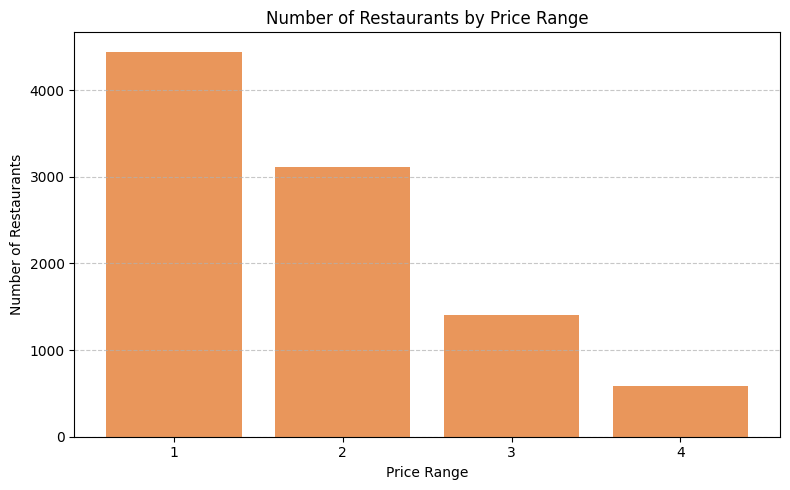

In [48]:
# Group by Price range and count number of restaurants
price_range_counts = df['Price range'].value_counts().sort_index()

# Plot histogram (bar chart)
plt.figure(figsize=(8, 5))
plt.bar(price_range_counts.index, price_range_counts.values, color='#e9965b')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants by Price Range')
plt.xticks(price_range_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [53]:
df['Price range'].value_counts(1)*100

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64

In [54]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [60]:
df['Has Online delivery'].value_counts('Yes').sort_values(ascending=True).head(1)*100

Has Online delivery
Yes    25.662234
Name: proportion, dtype: float64

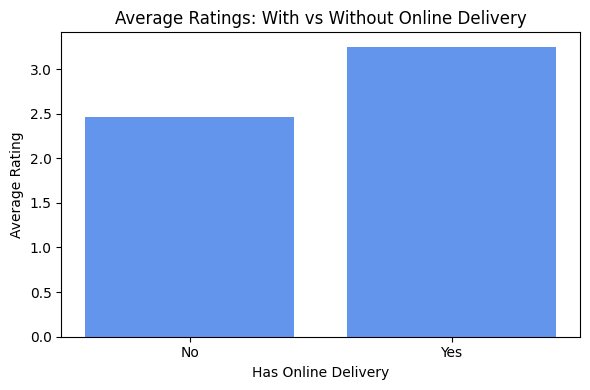

In [62]:
# Group by 'Has Online delivery' and calculate average rating
avg_ratings_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.bar(avg_ratings_delivery['Has Online delivery'], avg_ratings_delivery['Aggregate rating'], color='cornflowerblue')
plt.xlabel('Has Online Delivery')
plt.ylabel('Average Rating')
plt.title('Average Ratings: With vs Without Online Delivery')
plt.tight_layout()
plt.show()
